In [26]:
import cv2  
import matplotlib.pyplot as plt   
from google.colab import drive

In [27]:
# Mount Google Drive
drive.mount('/content/drive')


# Path to xml file containing HaaR cascade training https://github.com/opencv/opencv/tree/master/data/haarcascades
frontalface = '/content/drive/MyDrive/Machine learning/face_detection/haarcascade_frontalface_default.xml'
# Path to the image 
image = '/content/drive/MyDrive/Machine learning/face_detection/laiana.jpg'


#Performs the classification     
# It is this classifier that finds the portion of the image that corresponds to the faces
face_detection = cv2.CascadeClassifier(frontalface) 

# loading the image
img = cv2.imread(image)  

#convert BGR to RGB so we can plot it with matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#load the image in grayscale for easy viewing
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) 
# looking for image coordinates  
faces = face_detection.detectMultiScale(gray_img, scaleFactor = 1.05, minNeighbors=5) #  

#identifies the photo coordinates and draws the ellipse 
for x,y,w,h in faces:         
  center = (x + w//2, y + h//2)
  img = cv2.ellipse(img, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4) #desenha o retângulo ao redor da imagem 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


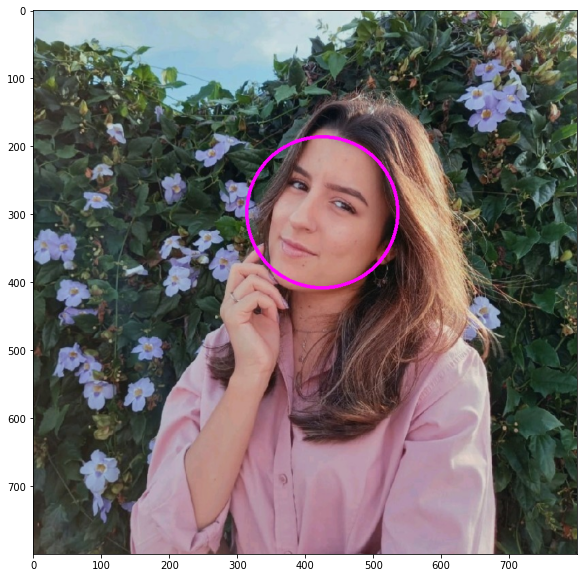

In [28]:
#define the size of the image to be plotted
plt.figure(figsize=(20,10))   
# show the image
plt.imshow(img) 
